# <font color='blue'>Análise de dados com Python e Pandas</font>

## Projeto - Análise de dados com Python e Pandas

## Análise 4

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')

In [ ]:
# Calcule a média de preço por marca e por veículo

In [5]:
trial = pd.DataFrame()

In [6]:
for b in list(df['brand'].unique()):
    for v in list(df['vehicleType'].unique()):
        z= df[(df['brand'] == b)& (df['vehicleType'] == v)]['price'].mean()
        trial = trial.append(pd.DataFrame({'brand': b, 'vehicleType': v, 'avgPrice': z}, index=[0]))
trial = trial.reset_index()
del trial['index']
trial['avgPrice'].fillna(0, inplace=True)
trial['avgPrice'].isnull().value_counts()
trial['avgPrice'] = trial['avgPrice'].astype(int)
trial.head(5)  


,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

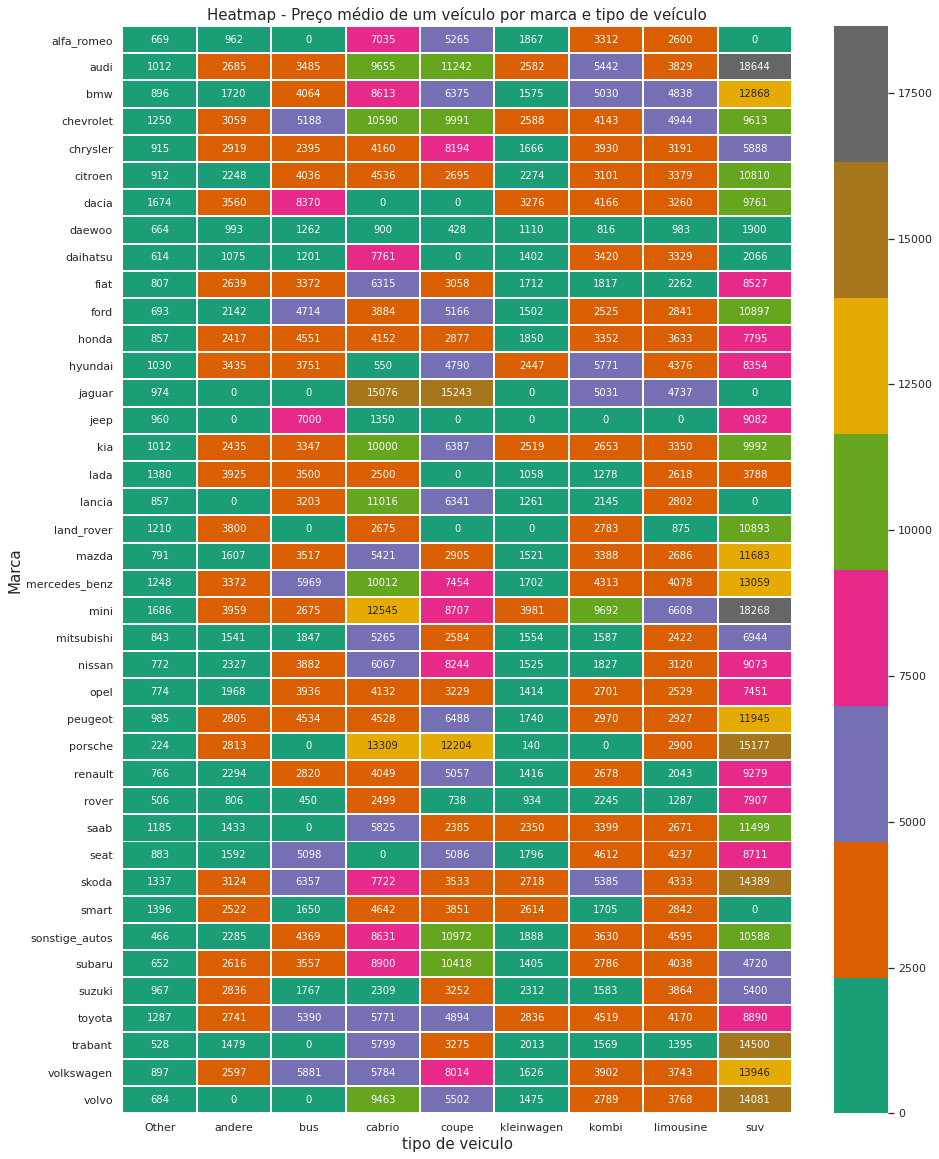

In [14]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
result = trial.pivot('brand', 'vehicleType', 'avgPrice')
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(result, linewidths=1, cmap='Dark2', annot=True, ax = ax,  fmt='d')
ax.set_title('Heatmap - Preço médio de um veículo por marca e tipo de veículo',fontdict={'size':15})
ax.xaxis.set_label_text('tipo de veiculo',fontdict={'size':15})
ax.yaxis.set_label_text('Marca',fontdict={'size':15})
plt.show()

In [5]:
# Salvando o plot
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")